In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# see all columns
pd.set_option('display.max_columns', None)
# set seaborn style to white
sns.set_style('whitegrid')
# set seaborn font to sans-serif
sns.set(font='sans-serif')
# set seaborn font scale to 1.25
sns.set(font_scale=1.15)

## Step 1: Handling Missing Data

Analyzing and handling missing data in the dataset.


## Data Description

The dataset appears to contain information about trips taken using a shared cars service. Below is a brief description of the available columns:

- `FromZoneID`, `ToZoneID`: Indicate the starting and ending zones of a trip, respectively.
- `DriveLength`: Represents the length of the drive.
- `FreeTime`, `CongTime`: Represent time spent in free-flow and congested conditions, respectively.
- `CarGenCost`: Seems to represent a general cost associated with the car.
- `NoOfChange`: Possibly indicates the number of changes in a trip.
- `WaitT`, `ZoneWaitT`, `ZoneConT`, `InVehicleT`: Various times related to waiting, being in a zone, and being in a vehicle, respectively.
- `PubDist`, `PubGenCost`: Represent distance and general cost associated with public transportation, respectively.
- `tripStart`, `tripEnd`: Indicate start and end times of the trip.
- `vehicleId`: Represents the ID of the vehicle used.
- `startPositionLat`, `startPositionLng`, `endPositionLat`, `endPositionLng`: Represent latitude and longitude coordinates for the start and end positions.
- `birthday`: Likely represents the birth year of the user.
- `sex`: Represents the gender of the user.

Note: Further feature engineering and data handling will be performed in the following steps.


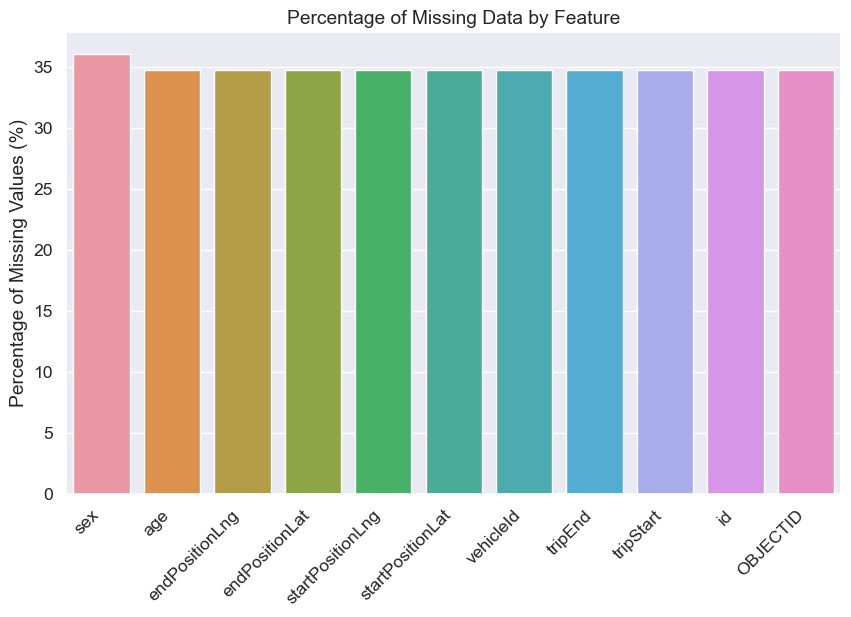

,Total,Percentage
sex,60933,36.028168
age,58686,34.699573
endPositionLng,58686,34.699573
endPositionLat,58686,34.699573
startPositionLng,58686,34.699573
startPositionLat,58686,34.699573
vehicleId,58686,34.699573
tripEnd,58686,34.699573
tripStart,58686,34.699573
id,58686,34.699573


In [3]:

# Load the dataset
file_path = "../data/processed/gm_raw.csv"
data = pd.read_csv(file_path)

# Rename the 'birthday' column to 'age'
data = data.rename(columns={'birthday': 'age'})

# Identify missing data
missing_data = data.isnull().sum().sort_values(ascending=False)
missing_percentage = (data.isnull().sum() / data.shape[0] * 100).sort_values(ascending=False)

# Display missing data
missing_info = pd.concat([missing_data, missing_percentage], axis=1, keys=['Total', 'Percentage'])
missing_info = missing_info[missing_info['Total'] > 0]

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_info.index, y='Percentage', data=missing_info)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Missing Values (%)')
plt.title('Percentage of Missing Data by Feature')
plt.show()

missing_info


## Step 2: Data Type Conversion

Ensuring that all columns have the appropriate data type.

In [4]:

# Check the first few rows and data types after corrections
data.head(), data.dtypes


(   FromZoneID  ToZoneID  DriveLength  FreeTime  CongTime  CarGenCost  \
 0      102110    102110     1.259823  5.519646       0.0         0.0   
 1      102110    102110     1.259823  5.519646       0.0         0.0   
 2      102110    102110     1.259823  5.519646       0.0         0.0   
 3      102110    102110     1.259823  5.519646       0.0         0.0   
 4      102110    102110     1.259823  5.519646       0.0         0.0   
 
    NoOfChange  WaitT  ZoneWaitT  ZoneConT  InVehicleT   PubDist  PubGenCost  \
 0         0.0    0.0       15.0       3.0    0.779469  0.459823         0.0   
 1         0.0    0.0       15.0       3.0    0.779469  0.459823         0.0   
 2         0.0    0.0       15.0       3.0    0.779469  0.459823         0.0   
 3         0.0    0.0       15.0       3.0    0.779469  0.459823         0.0   
 4         0.0    0.0       15.0       3.0    0.779469  0.459823         0.0   
 
    OBJECTID        id            tripStart              tripEnd  vehicleId  \

In [5]:

# Columns 'tripStart' and 'tripEnd' should be datetime objects
data['tripStart'] = pd.to_datetime(data['tripStart'], errors='coerce')
data['tripEnd'] = pd.to_datetime(data['tripEnd'], errors='coerce')

# Extracting the month from 'tripStart'
data['Month'] = data['tripStart'].dt.month_name()

# drop the nan values in the 'Month' column
data = data.dropna(subset=['Month'])
# convert month to categorical
data['Month'] = data['Month'].astype('category')

# Extracting 'Weekday' and 'StartHour' for further analysis
data['Weekday'] = data['tripStart'].dt.day_name()
# convert weekday to categorical
data['Weekday'] = data['Weekday'].astype('category')

data['StartHour'] = data['tripStart'].dt.hour
# convert start hour to categorical
data['StartHour'] = data['StartHour'].astype('category')
# Check the data types after conversion and the first few rows of data


# Renaming the 'birthday' column to 'age'
data.rename(columns={'birthday': 'age'}, inplace=True)
# set sex to categorical
data['sex'] = data['sex'].astype('category')

data.dtypes, data.head()


(FromZoneID                   int64
 ToZoneID                     int64
 DriveLength                float64
 FreeTime                   float64
 CongTime                   float64
 CarGenCost                 float64
 NoOfChange                 float64
 WaitT                      float64
 ZoneWaitT                  float64
 ZoneConT                   float64
 InVehicleT                 float64
 PubDist                    float64
 PubGenCost                 float64
 OBJECTID                   float64
 id                         float64
 tripStart           datetime64[ns]
 tripEnd             datetime64[ns]
 vehicleId                  float64
 startPositionLat           float64
 startPositionLng           float64
 endPositionLat             float64
 endPositionLng             float64
 age                        float64
 sex                       category
 Month                     category
 Weekday                   category
 StartHour                 category
 dtype: object,
    FromZone

## Step 3: Exploring Distributions

Visualizing the distribution of various numerical and categorical variables.

In [6]:
# data.CongTime = data.CongTime.apply(lambda x: x*60)

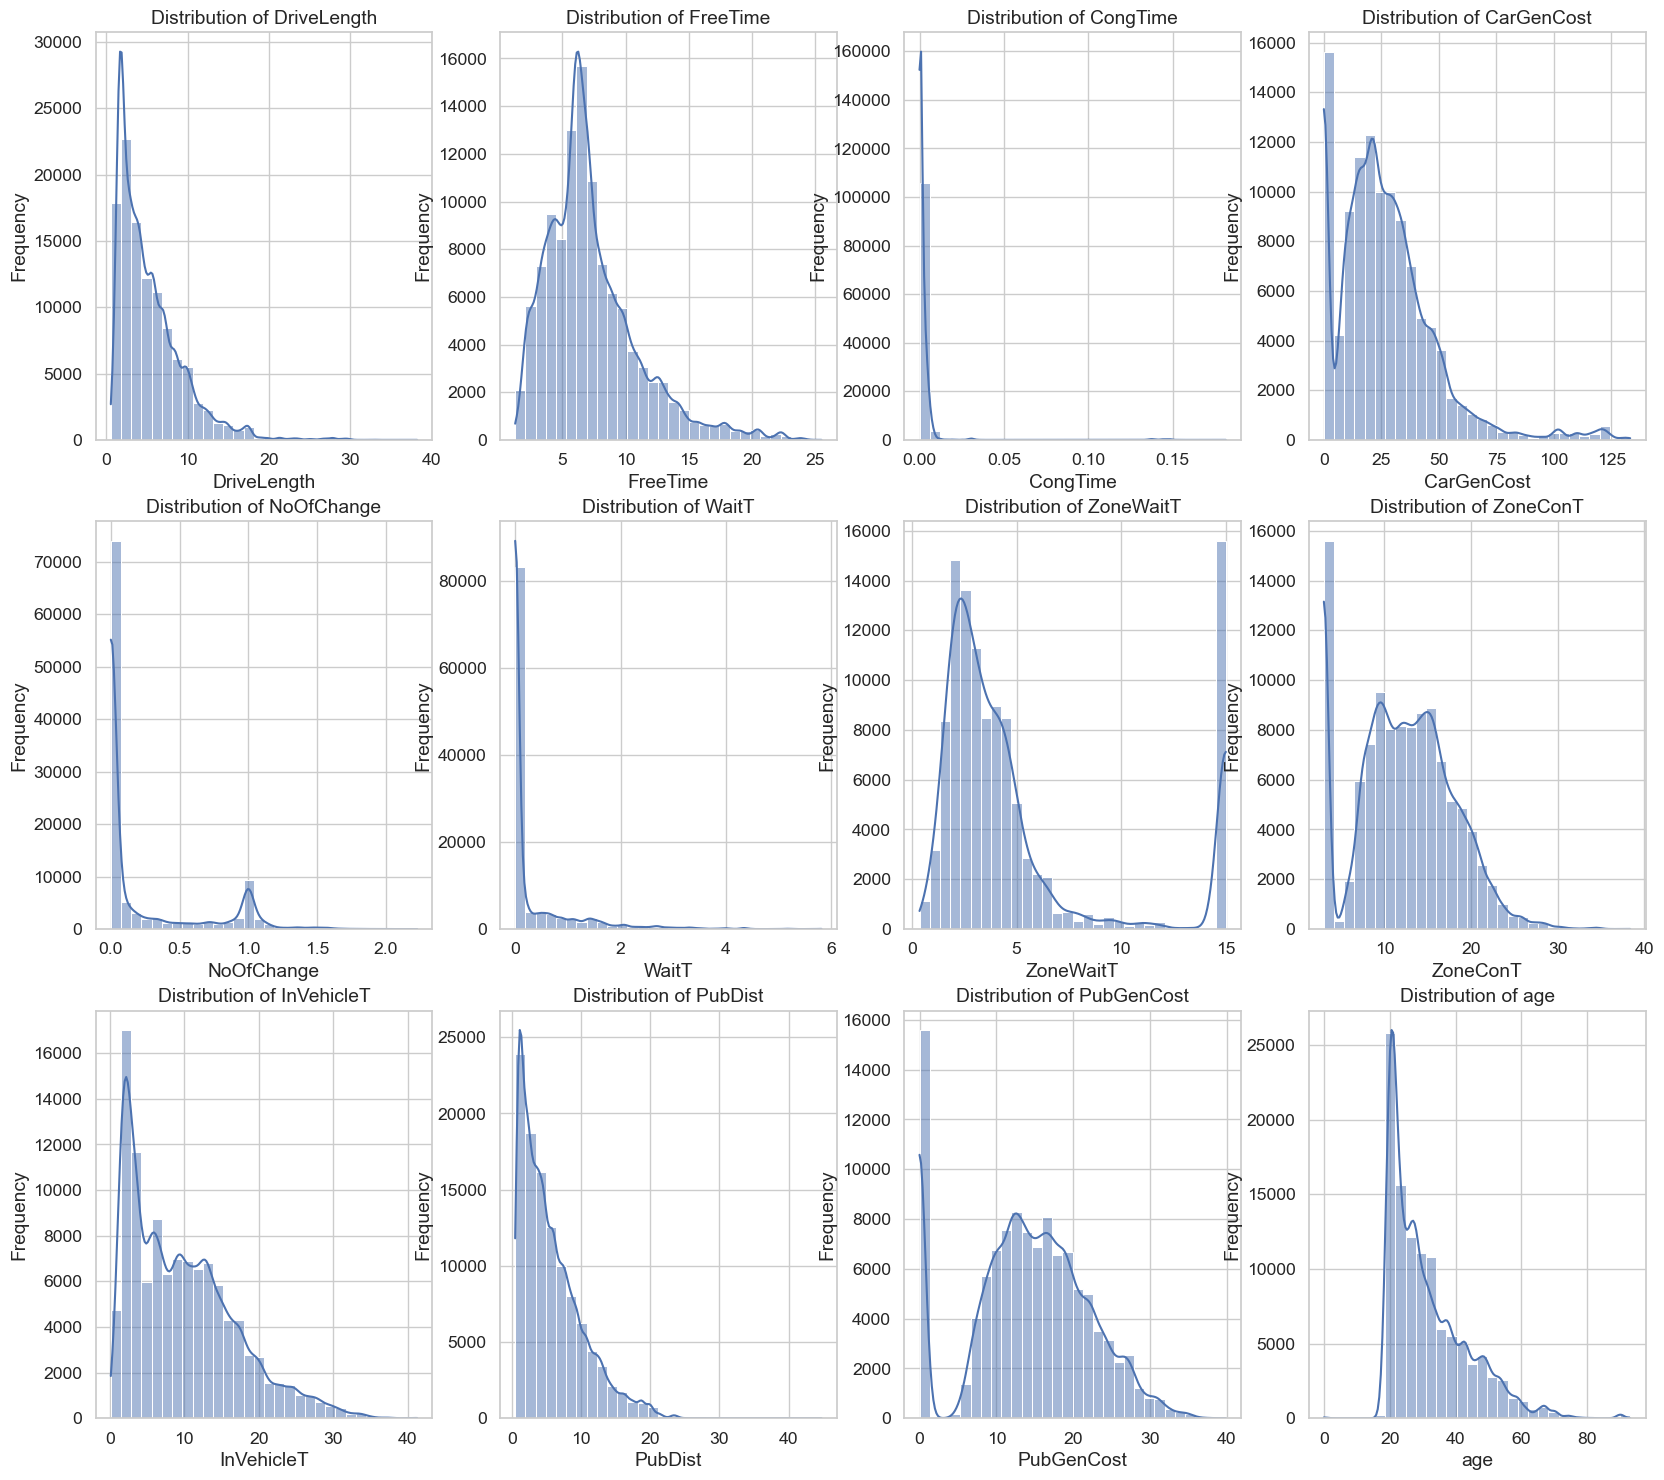

In [7]:

import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Initialize the figure
plt.figure(figsize=(20, 18))

# Creating a list of numerical variables
num_vars = ['DriveLength', 'FreeTime', 'CongTime', 'CarGenCost', 'NoOfChange', 'WaitT', 'ZoneWaitT', 'ZoneConT', 'InVehicleT', 'PubDist', 'PubGenCost', 'age']

# Creating subplots for each numerical variable
for i, var in enumerate(num_vars, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data=data, x=var, bins=30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

# Adjust the layout
# plt.tight_layout()
plt.show()


## Step 4: Outlier Detection and Handling

Identifying and addressing potential outliers in the dataset.

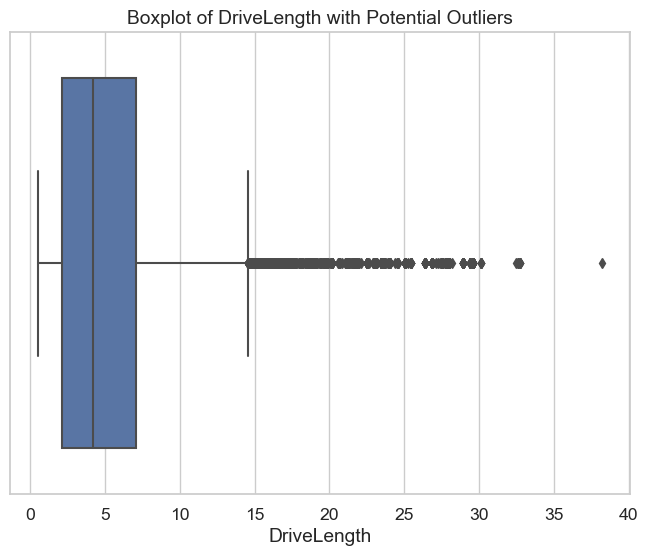

,DriveLength
2135,14.966546
2136,14.966546
2137,14.966546
2138,14.966546
2139,14.966546


In [8]:

# Outlier detection using IQR method for 'DriveLength' as an example
Q1 = data['DriveLength'].quantile(0.25)
Q3 = data['DriveLength'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = data[(data['DriveLength'] < lower_bound) | (data['DriveLength'] > upper_bound)]

# Visualize 'DriveLength' with potential outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['DriveLength'])
plt.title('Boxplot of DriveLength with Potential Outliers')
plt.show()

# Display outliers
outliers[['DriveLength']].head()


## Step 5: Feature Exploration

Exploring the relationships between different features through various plots.

c:\ProgramData\anaconda3\envs\thesis\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


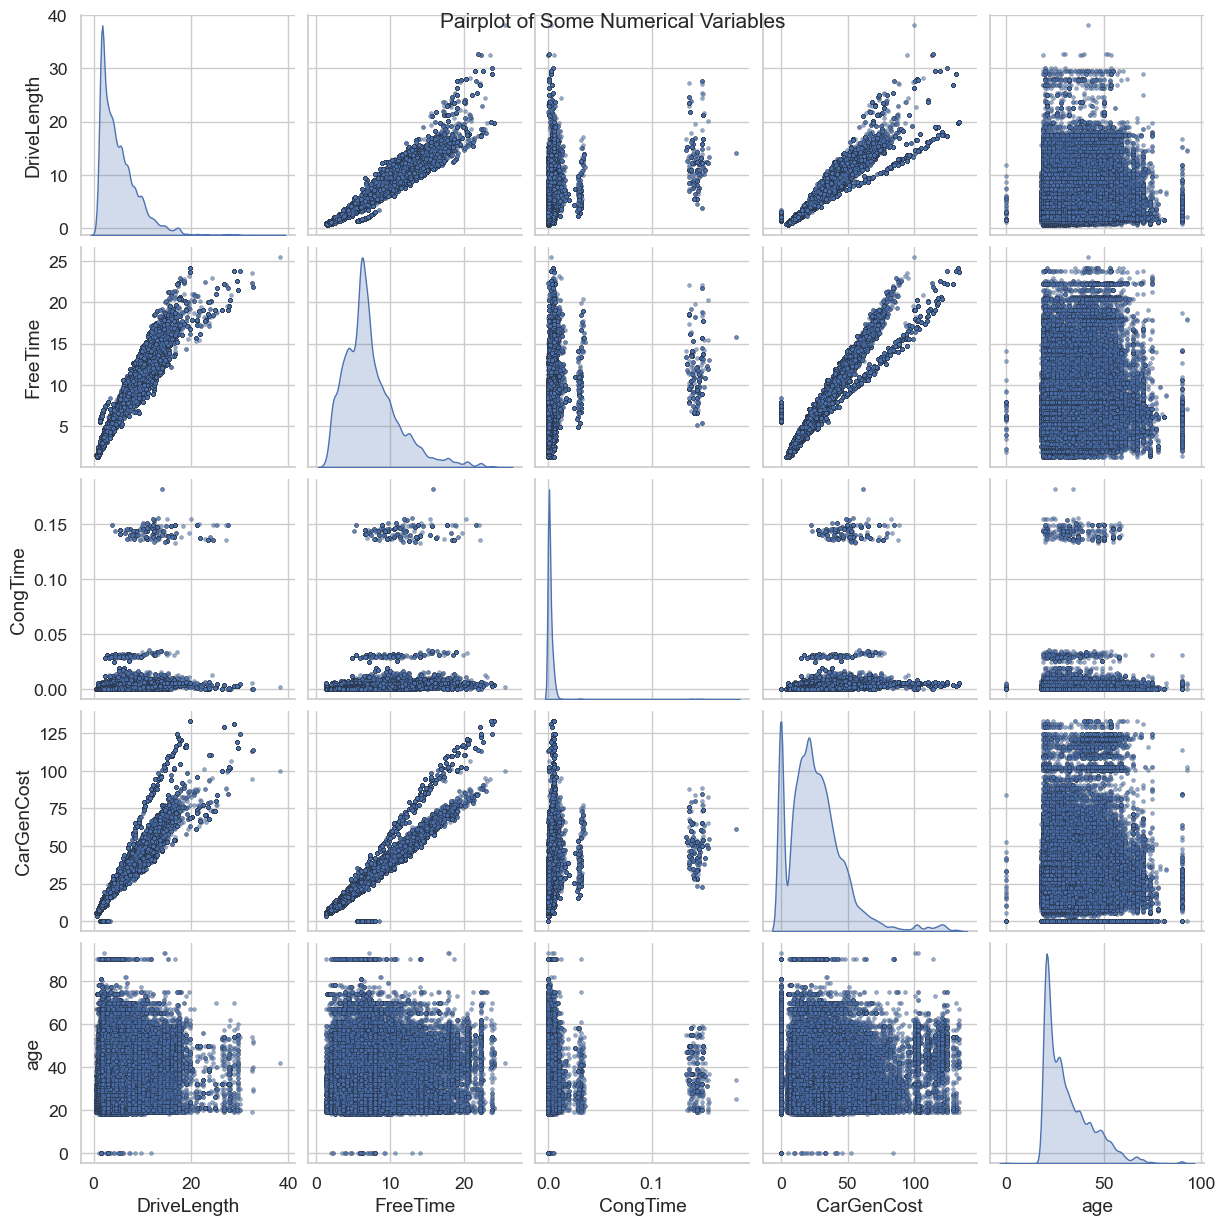

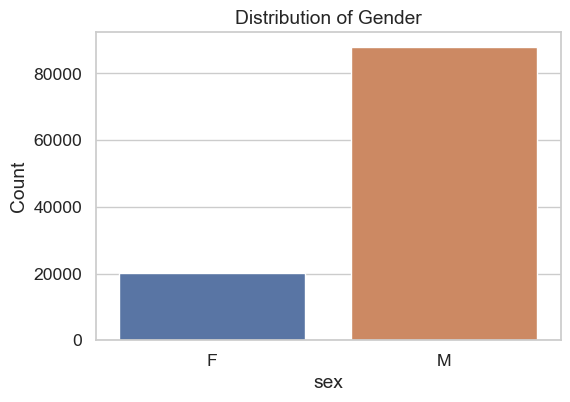

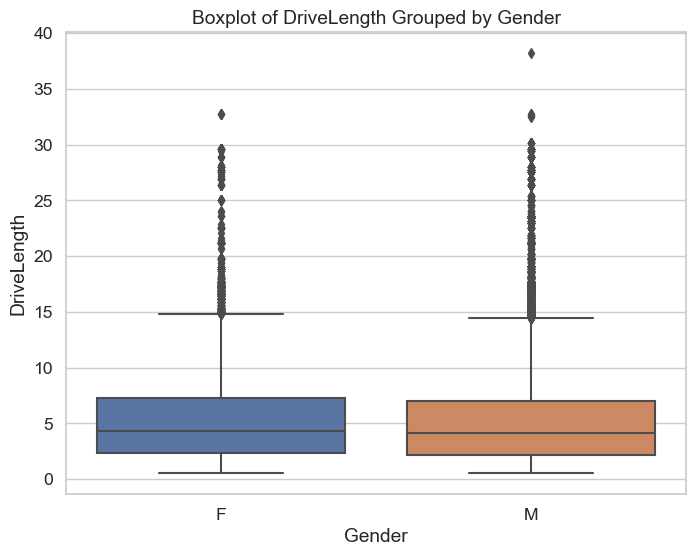

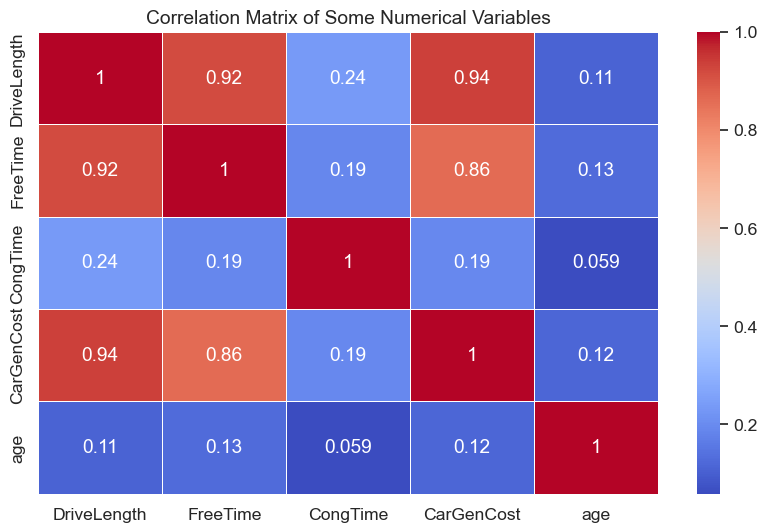

In [9]:

# Visualizing relationships between some numerical variables using a pairplot
sns.pairplot(data=data[['DriveLength', 'FreeTime', 'CongTime', 'CarGenCost', 'age']], diag_kind='kde', plot_kws={'alpha': 0.6, 's': 8, 'edgecolor': 'k'})
plt.suptitle('Pairplot of Some Numerical Variables', size=15)
plt.show()

# Visualizing the distribution of 'sex' using a bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=data)
plt.title('Distribution of Gender')
plt.ylabel('Count')
plt.show()

# Visualizing the relationship between 'age' and 'DriveLength'
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='DriveLength', data=data)
plt.title('Boxplot of DriveLength Grouped by Gender')
plt.ylabel('DriveLength')
plt.xlabel('Gender')
plt.show()

# Correlation matrix of some numerical variables
corr_matrix = data[['DriveLength', 'FreeTime', 'CongTime', 'CarGenCost', 'age']].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Some Numerical Variables')
plt.show()


## Additional Feature Exploration

Delving deeper into exploring more features and their interconnectedness.

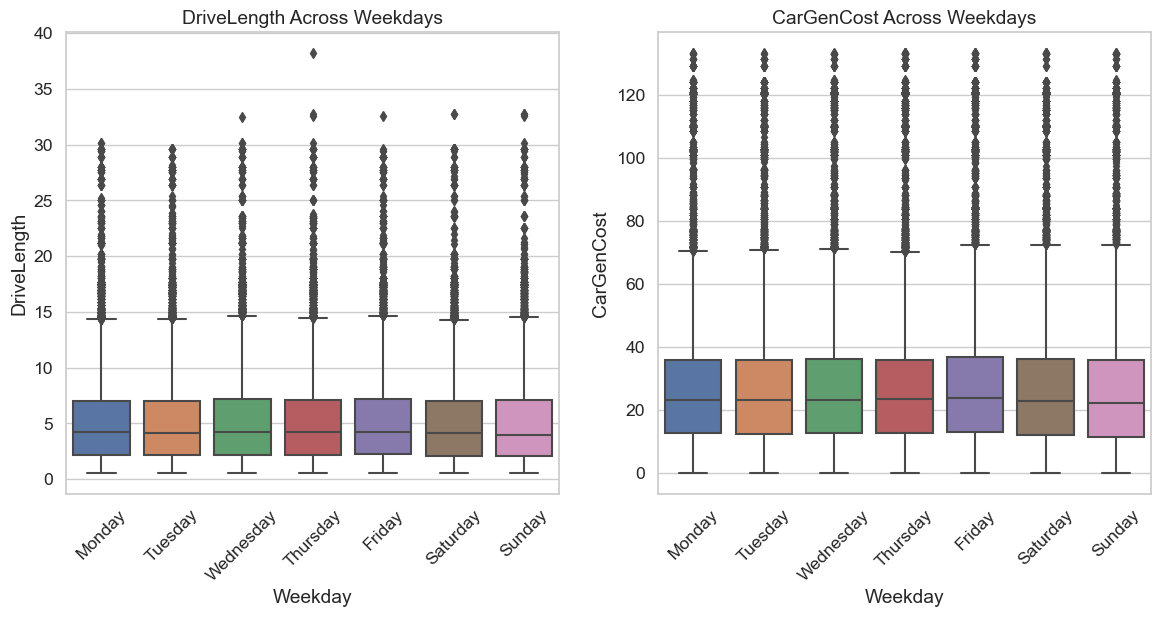

In [10]:
# Visualizing 'DriveLength' and 'CarGenCost' across weekdays
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Weekday', y='DriveLength', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('DriveLength Across Weekdays')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='Weekday', y='CarGenCost', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('CarGenCost Across Weekdays')
plt.xticks(rotation=45)

#plt.tight_layout()
plt.show()


## Step 6: Further Feature Engineering

Creating new features, exploring timeseries aspects, and visualizing the number of trips per weekday.

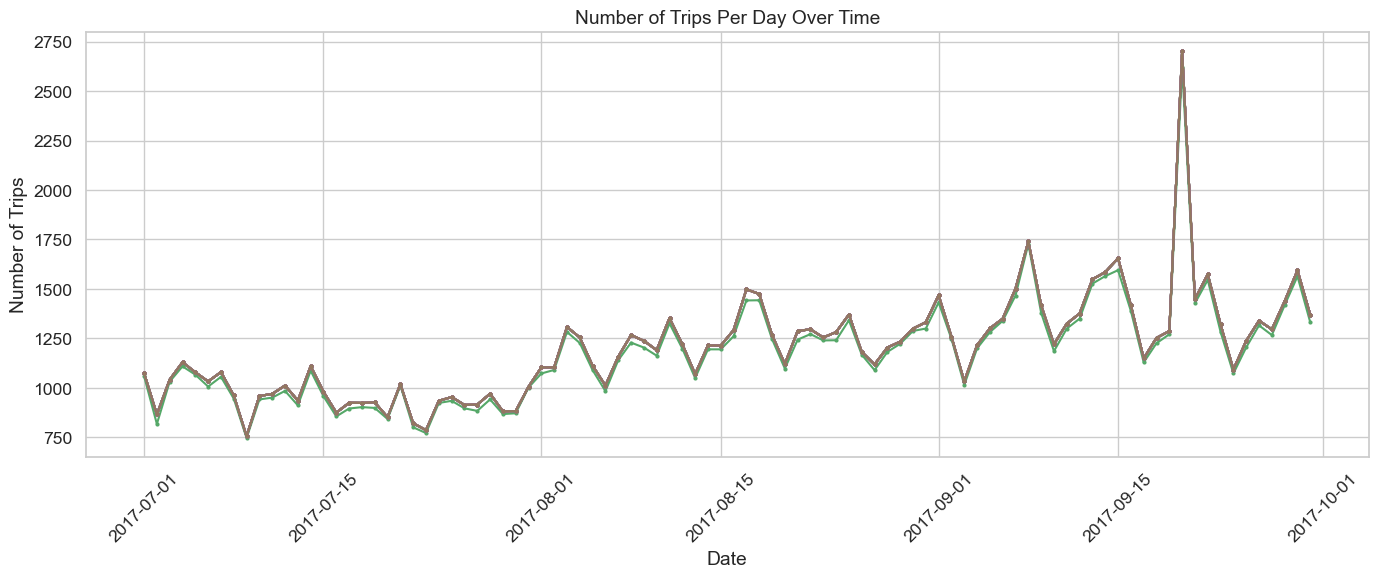

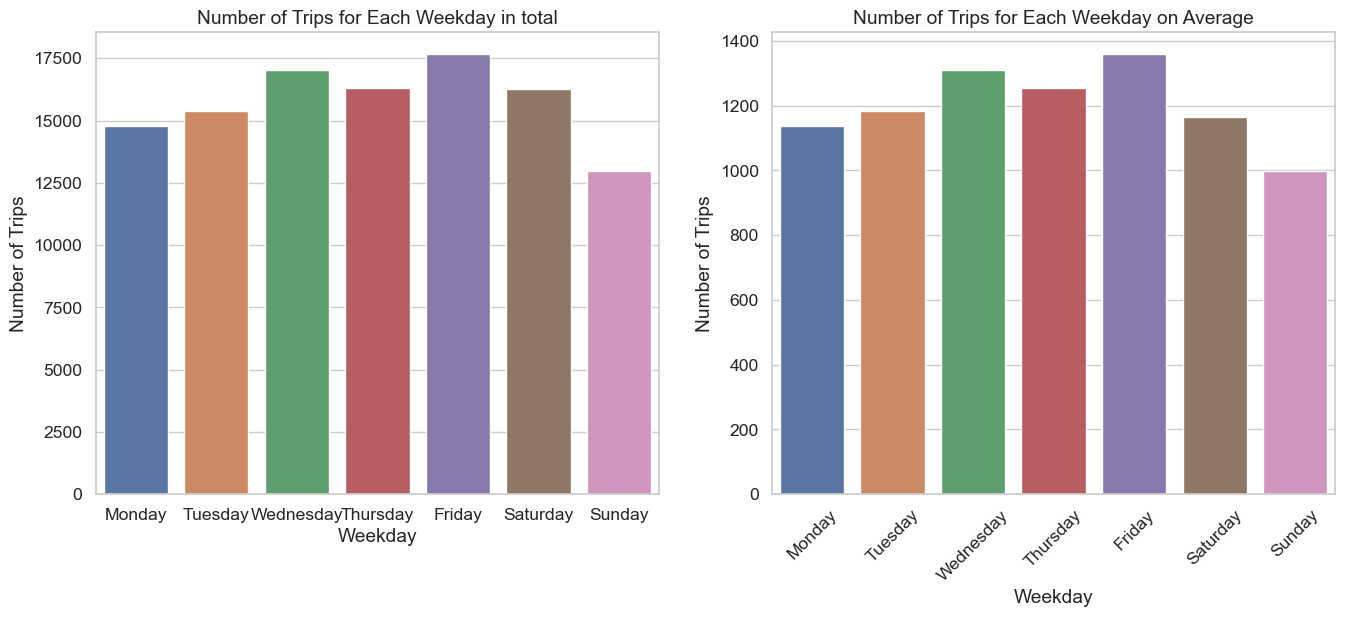

In [11]:
# Creating a copy of the dataset with 'tripStart' as the index for timeseries analysis
ts_data = data.copy()
ts_data.set_index('tripStart', inplace=True)
daily_trips = ts_data.resample('D').count()

# Visualizing the number of trips per day over time
plt.figure(figsize=(14, 6))
plt.plot(daily_trips.index, daily_trips.values, marker='o', linestyle='-', markersize=2)
plt.title('Number of Trips Per Day Over Time')
plt.ylabel('Number of Trips')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Creating a plot for the number of trips per weekday
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Weekday', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Trips for Each Weekday in total')
plt.ylabel('Number of Trips')
plt.xlabel('Weekday')
# Creating a plot for the number of trips per weekday on average
# get the dates range of the dataset based on tripStart
start_date = data['tripStart'].min()
end_date = data['tripStart'].max()

# obtain the number of days between the start and end dates
days = pd.date_range(start=start_date, end=end_date, freq='D').to_series()

# count nr of each weekday in the interval
weekdays_count = days.dt.day_name().value_counts().sort_index()
# count the number of trips for each weekday in total
weekday_trips_count = data.Weekday.value_counts().sort_index()

# calculate average number of trips for each weekday
avg_trips = (weekday_trips_count / weekdays_count).to_frame().reset_index()
# plot the average number of trips for each weekday

plt.subplot(1, 2, 2)
sns.barplot(x = 'Weekday', y = 'count', data= avg_trips, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Trips for Each Weekday on Average')
plt.ylabel('Number of Trips')
plt.xlabel('Weekday')
plt.xticks(rotation=45)
plt.show()




## Step 7: Additional Insights

Exploring additional insights, such as peak times, average cost variations, and patterns in service usage.

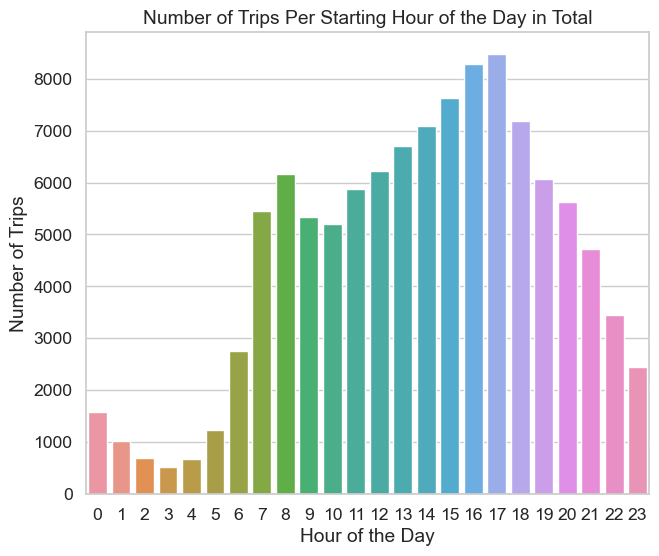

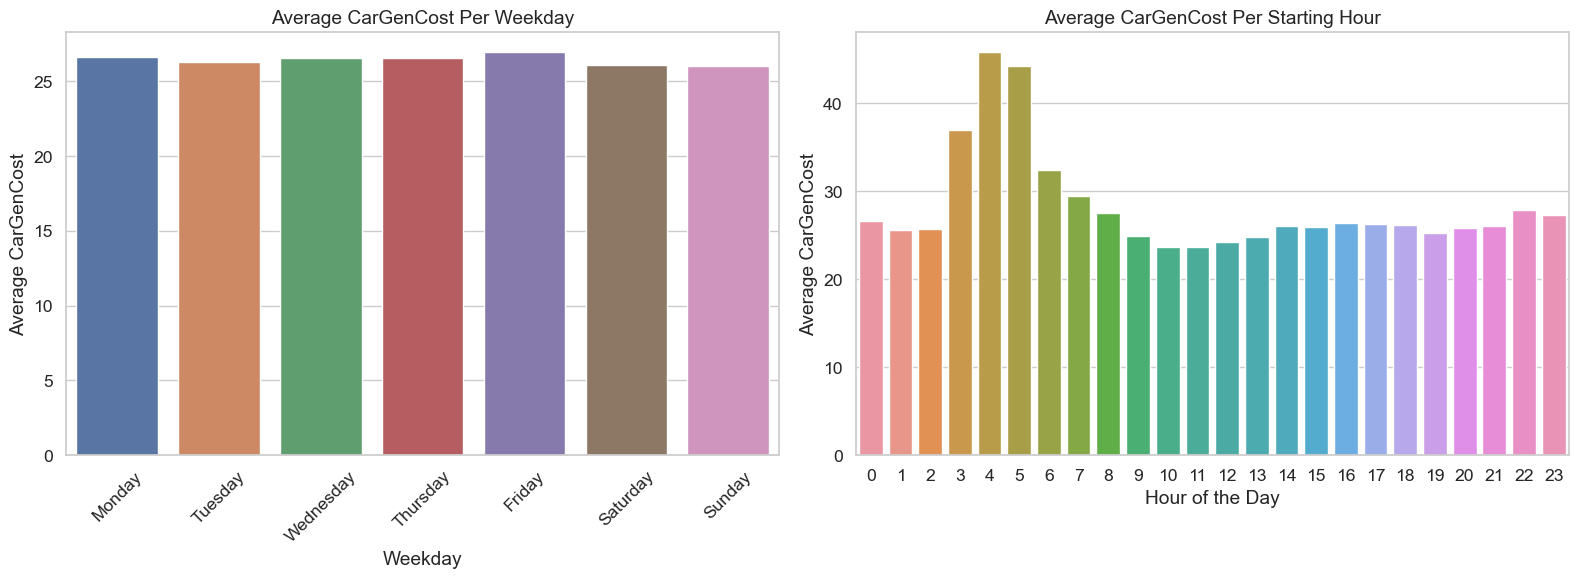

In [12]:

# Extracting hour from 'tripStart' to analyze peak and off-peak times
data['StartHour'] = data['tripStart'].dt.hour

# set start hour to categorical
data['StartHour'] = data['StartHour'].astype('category')
# Visualizing the number of trips per starting hour
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='StartHour', data=data)
plt.title('Number of Trips Per Starting Hour of the Day in Total')
plt.ylabel('Number of Trips')
plt.xlabel('Hour of the Day')
plt.show()

# Analyzing the average 'CarGenCost' per weekday and starting hour
avg_cost_weekday = data.groupby('Weekday')['CarGenCost'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
avg_cost_hour = data.groupby('StartHour')['CarGenCost'].mean()

# Visualizing the average 'CarGenCost' per weekday
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=avg_cost_weekday.index, y=avg_cost_weekday.values)
plt.title('Average CarGenCost Per Weekday')
plt.ylabel('Average CarGenCost')
plt.xlabel('Weekday')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=avg_cost_hour.index, y=avg_cost_hour.values)
plt.title('Average CarGenCost Per Starting Hour')
plt.ylabel('Average CarGenCost')

plt.xlabel('Hour of the Day')

plt.tight_layout()
plt.show()


## Timeseries Adjustments and Additional Insights

Adjusting timeseries analysis and exploring moving averages of trips.

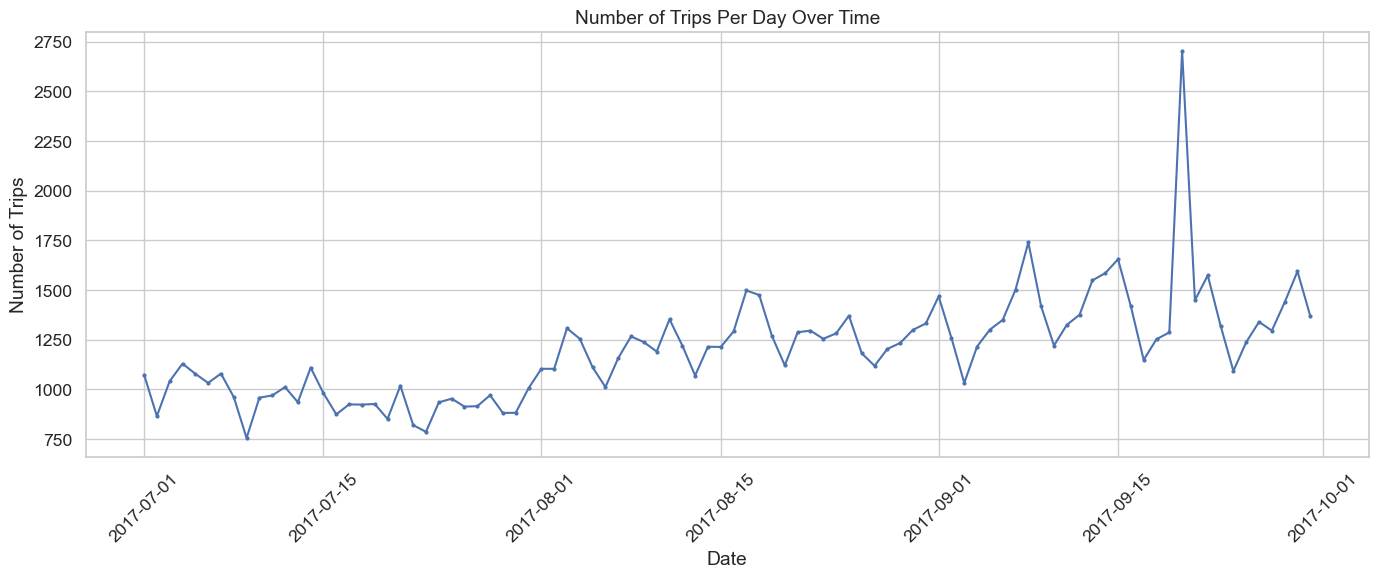

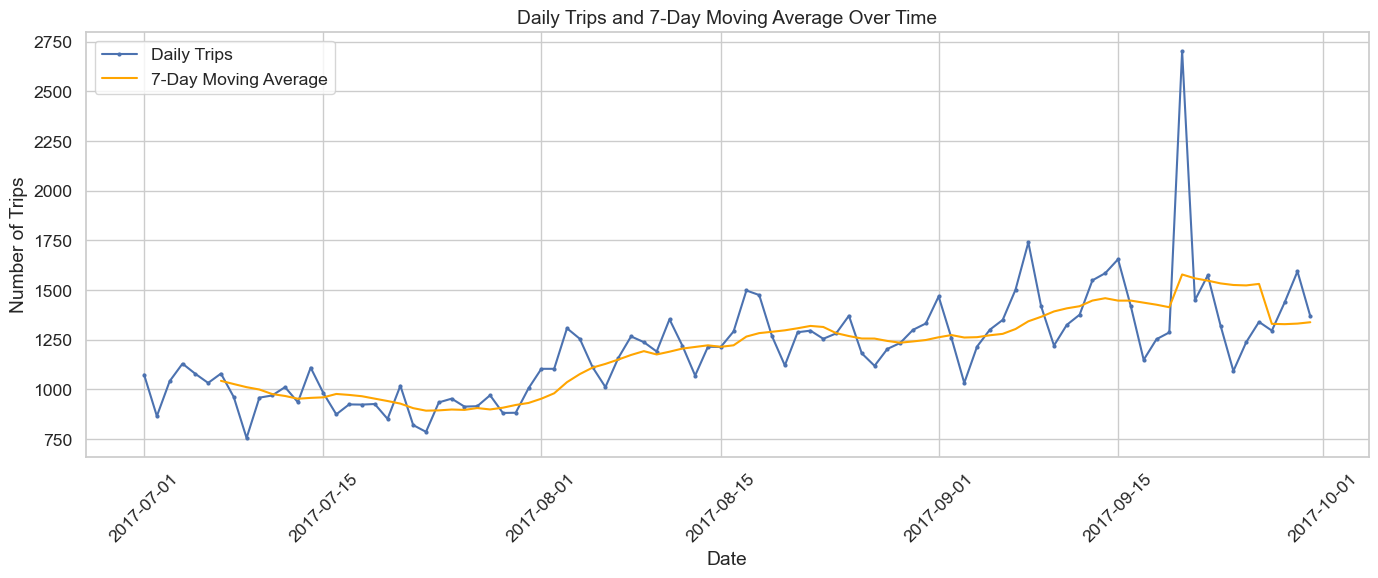

In [13]:

# Creating a copy of the dataset with 'tripStart' as the index for timeseries analysis
ts_data = data.copy()
ts_data.set_index('tripStart', inplace=True)

# Resampling 'tripStart' to daily frequency and counting the number of trips
daily_trips = ts_data.resample('D').size()

# Visualizing the number of trips per day over time
plt.figure(figsize=(14, 6))
plt.plot(daily_trips.index, daily_trips.values, marker='o', linestyle='-', markersize=2)
plt.title('Number of Trips Per Day Over Time')
plt.ylabel('Number of Trips')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculating and visualizing the 7-day moving average of trips per day
moving_avg = daily_trips.rolling(window=7).mean()

plt.figure(figsize=(14, 6))
plt.plot(daily_trips.index, daily_trips.values, label='Daily Trips', marker='o', linestyle='-', markersize=2)
plt.plot(moving_avg.index, moving_avg.values, label='7-Day Moving Average', linestyle='-', color='orange')
plt.title('Daily Trips and 7-Day Moving Average Over Time')
plt.ylabel('Number of Trips')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## Step 8: User Behavior Analysis

Analyzing user behaviors, segmenting users, and understanding their journeys.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110440 entries, 0 to 164266
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   FromZoneID        110440 non-null  int64         
 1   ToZoneID          110440 non-null  int64         
 2   DriveLength       110440 non-null  float64       
 3   FreeTime          110440 non-null  float64       
 4   CongTime          110440 non-null  float64       
 5   CarGenCost        110440 non-null  float64       
 6   NoOfChange        110440 non-null  float64       
 7   WaitT             110440 non-null  float64       
 8   ZoneWaitT         110440 non-null  float64       
 9   ZoneConT          110440 non-null  float64       
 10  InVehicleT        110440 non-null  float64       
 11  PubDist           110440 non-null  float64       
 12  PubGenCost        110440 non-null  float64       
 13  OBJECTID          110440 non-null  float64       
 14  id       

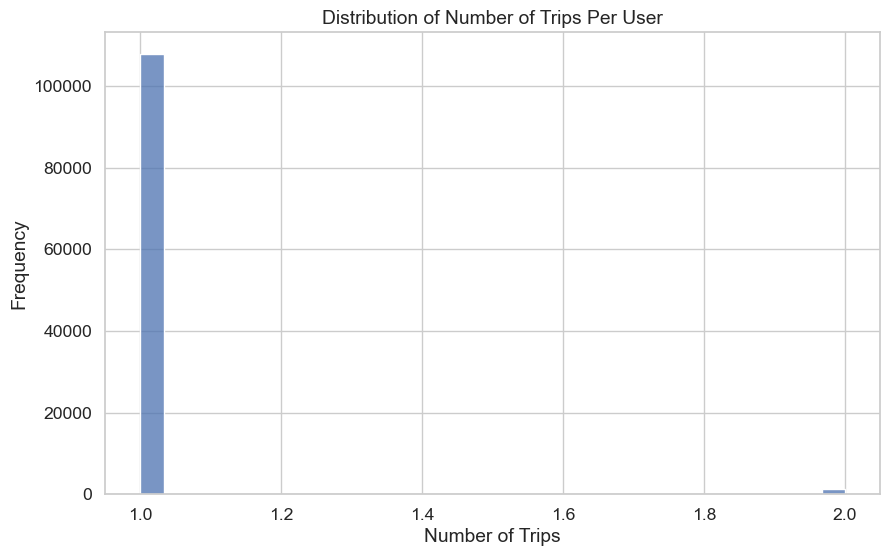

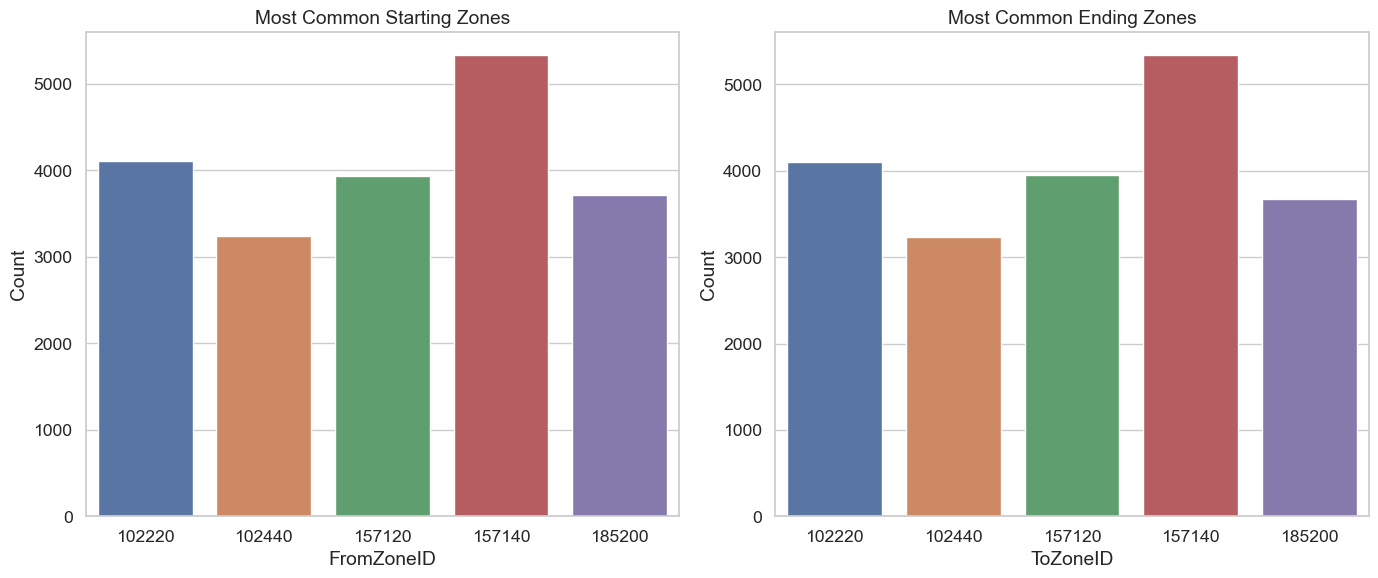

(FromZoneID
 157140    5336
 102220    4111
 157120    3935
 185200    3718
 102440    3239
 Name: count, dtype: int64,
 ToZoneID
 157140    5343
 102220    4105
 157120    3953
 185200    3678
 102440    3236
 Name: count, dtype: int64)

In [15]:

# User Segmentation: Frequency of use
# Creating a count of trips per user
user_trip_count = data['id'].value_counts()

# Visualizing the distribution of the number of trips per user
plt.figure(figsize=(10, 6))
sns.histplot(user_trip_count, bins=30, kde=False)
plt.title('Distribution of Number of Trips Per User')
plt.xlabel('Number of Trips')
plt.ylabel('Frequency')
plt.show()

# User Journey Analysis: Common Starting and Ending Zones
# Identifying the most common 'FromZoneID' and 'ToZoneID'
common_from_zone = data['FromZoneID'].value_counts().head(5)
common_to_zone = data['ToZoneID'].value_counts().head(5)

# Visualizing the most common 'FromZoneID' and 'ToZoneID'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=common_from_zone.index, y=common_from_zone.values)
plt.title('Most Common Starting Zones')
plt.xlabel('FromZoneID')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.barplot(x=common_to_zone.index, y=common_to_zone.values)
plt.title('Most Common Ending Zones')
plt.xlabel('ToZoneID')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Displaying the most common 'FromZoneID' and 'ToZoneID'
common_from_zone, common_to_zone


## Step 9: Location Analysis

Exploring heatmaps for ride concentrations and analyzing common zone transitions.

C:\Users\mihai\AppData\Local\Temp\ipykernel_22500\3347205451.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x='FromZoneID', bins=30, kde=False, palette='viridis')


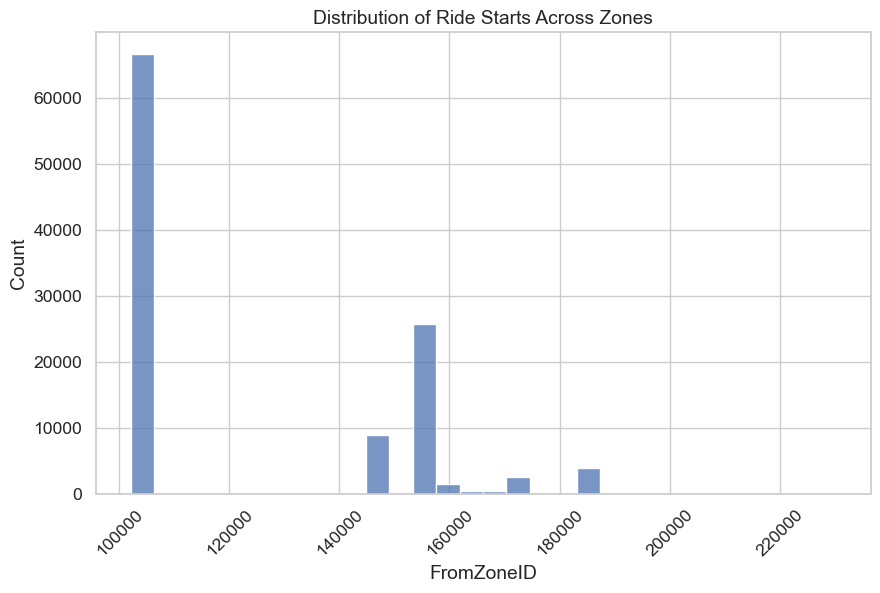

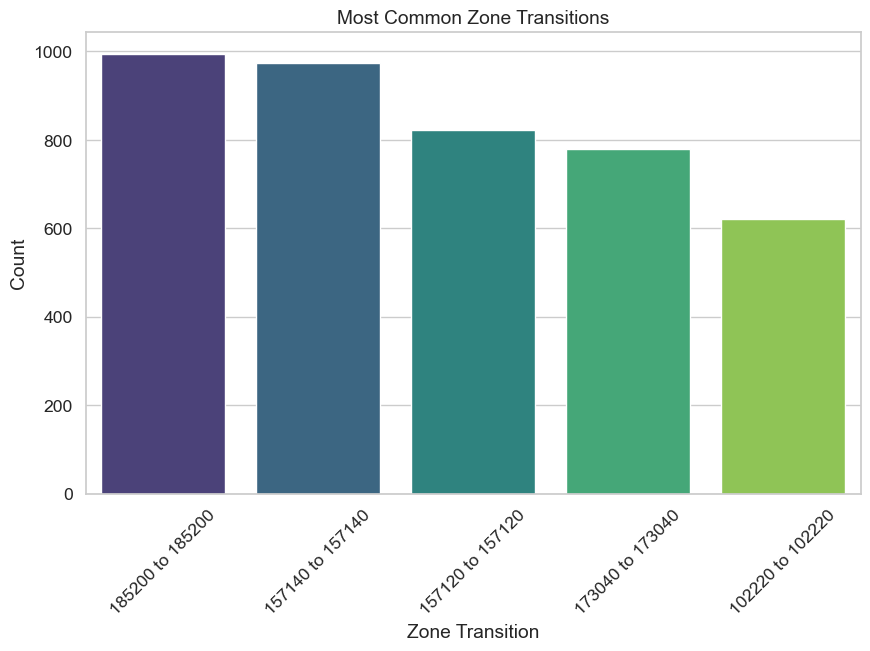

ZoneTransition
185200 to 185200    995
157140 to 157140    973
157120 to 157120    823
173040 to 173040    779
102220 to 102220    621
Name: count, dtype: int64

In [16]:

# Location Analysis: Heatmaps and Zone Transition Analysis

# Heatmaps: Visualizing the concentration of ride starts in different zones
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='FromZoneID', bins=30, kde=False, palette='viridis')
plt.title('Distribution of Ride Starts Across Zones')
plt.xlabel('FromZoneID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Zone Transition Analysis: Common transitions between zones
# Creating a new column to represent zone transitions
data['ZoneTransition'] = data['FromZoneID'].astype(str) + ' to ' + data['ToZoneID'].astype(str)

# Identifying the most common zone transitions
common_transitions = data['ZoneTransition'].value_counts().head(5)

# Visualizing the most common zone transitions
plt.figure(figsize=(10, 6))
sns.barplot(x=common_transitions.index, y=common_transitions.values, palette='viridis')
plt.title('Most Common Zone Transitions')
plt.xlabel('Zone Transition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Displaying the most common zone transitions
common_transitions


## Step 10: Temporal Analysis

Exploring seasonal and hourly patterns in the dataset.

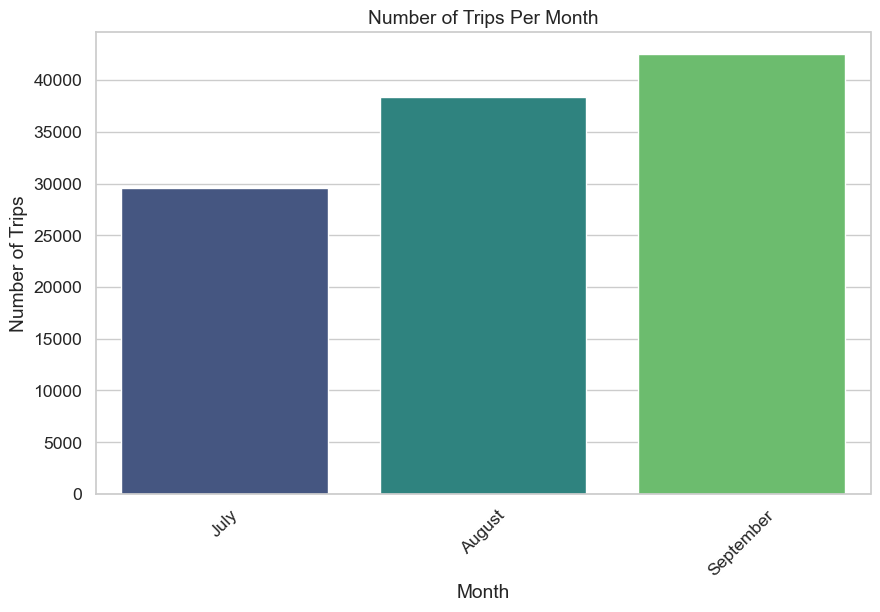

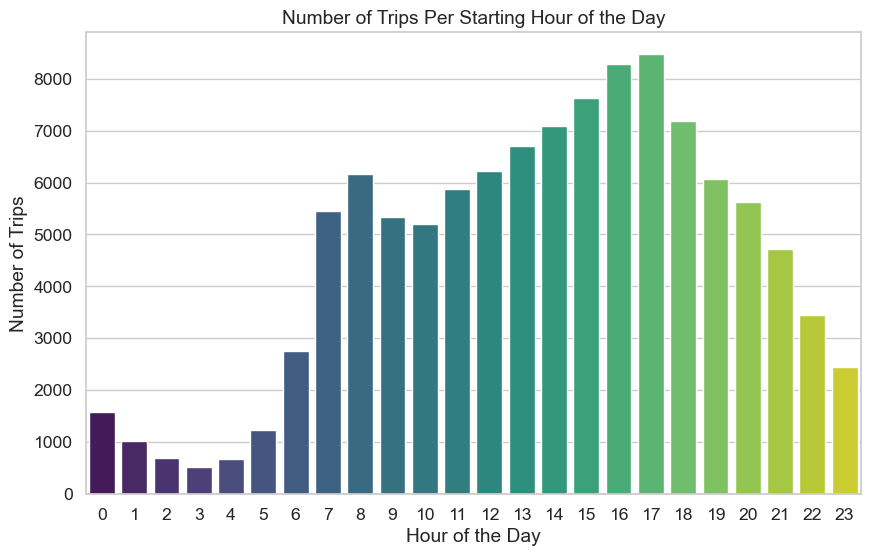

(Month
 September    42519
 August       38339
 July         29582
 Name: count, dtype: int64,
 StartHour
 0     1591
 1     1024
 2      699
 3      533
 4      672
 5     1235
 6     2749
 7     5445
 8     6165
 9     5336
 10    5206
 11    5883
 12    6219
 13    6701
 14    7095
 15    7623
 16    8287
 17    8469
 18    7176
 19    6075
 20    5626
 21    4723
 22    3454
 23    2454
 Name: count, dtype: int64)

In [17]:

# Temporal Analysis: Seasonality and Hourly Patterns

# Seasonality: Monthly variation in the number of trips
# Calculating the number of trips per month
monthly_trips = data['Month'].value_counts()

# Visualizing the number of trips per month
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_trips.index, y=monthly_trips.values, order=data['Month'].unique(), palette='viridis')
plt.title('Number of Trips Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

# Hourly Patterns: Variation in the number of trips across hours of the day
# Calculating the number of trips per starting hour
hourly_trips = data['StartHour'].value_counts().sort_index()

# Visualizing the number of trips per starting hour of the day
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette='viridis')
plt.title('Number of Trips Per Starting Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

# Displaying the number of trips per month and per starting hour of the day
monthly_trips, hourly_trips


In [18]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 110440 entries, 0 to 164266
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   FromZoneID        110440 non-null  int64         
 1   ToZoneID          110440 non-null  int64         
 2   DriveLength       110440 non-null  float64       
 3   FreeTime          110440 non-null  float64       
 4   CongTime          110440 non-null  float64       
 5   CarGenCost        110440 non-null  float64       
 6   NoOfChange        110440 non-null  float64       
 7   WaitT             110440 non-null  float64       
 8   ZoneWaitT         110440 non-null  float64       
 9   ZoneConT          110440 non-null  float64       
 10  InVehicleT        110440 non-null  float64       
 11  PubDist           110440 non-null  float64       
 12  PubGenCost        110440 non-null  float64       
 13  OBJECTID          110440 non-null  float64       
 14  id       

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110440 entries, 0 to 164266
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   FromZoneID        110440 non-null  int64         
 1   ToZoneID          110440 non-null  int64         
 2   DriveLength       110440 non-null  float64       
 3   FreeTime          110440 non-null  float64       
 4   CongTime          110440 non-null  float64       
 5   CarGenCost        110440 non-null  float64       
 6   NoOfChange        110440 non-null  float64       
 7   WaitT             110440 non-null  float64       
 8   ZoneWaitT         110440 non-null  float64       
 9   ZoneConT          110440 non-null  float64       
 10  InVehicleT        110440 non-null  float64       
 11  PubDist           110440 non-null  float64       
 12  PubGenCost        110440 non-null  float64       
 13  OBJECTID          110440 non-null  float64       
 14  id       

In [20]:
data.tripStart.min(), data.tripStart.max()


(Timestamp('2017-07-01 00:13:04'), Timestamp('2017-09-30 23:58:45'))

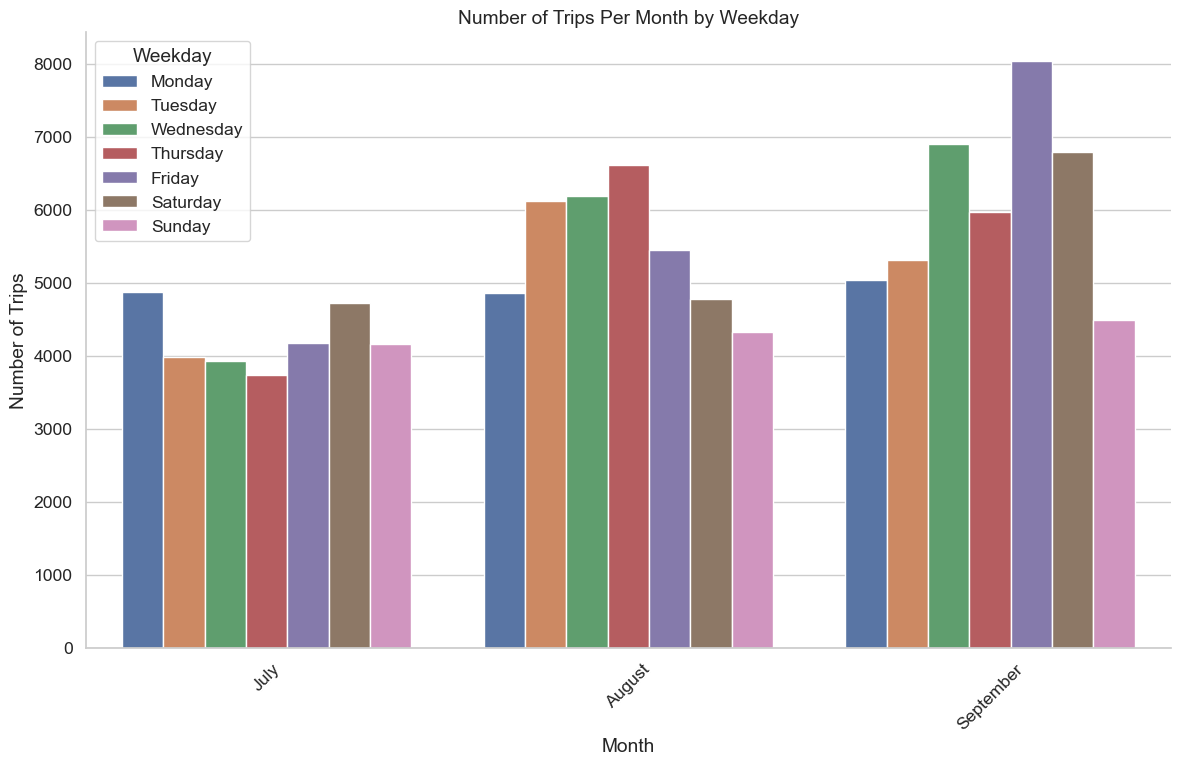

In [21]:
# plot the number of trips per month by weekday 
plt.figure(figsize=(14, 8))

sns.countplot(x='Month', hue='Weekday', data=data, order=data['Month'].unique(), hue_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Trips Per Month by Weekday')
plt.xlabel('Month')
plt.ylabel('Number of Trips')

plt.xticks(rotation=45)
sns.despine()
plt.show()


c:\ProgramData\anaconda3\envs\thesis\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x800 with 0 Axes>

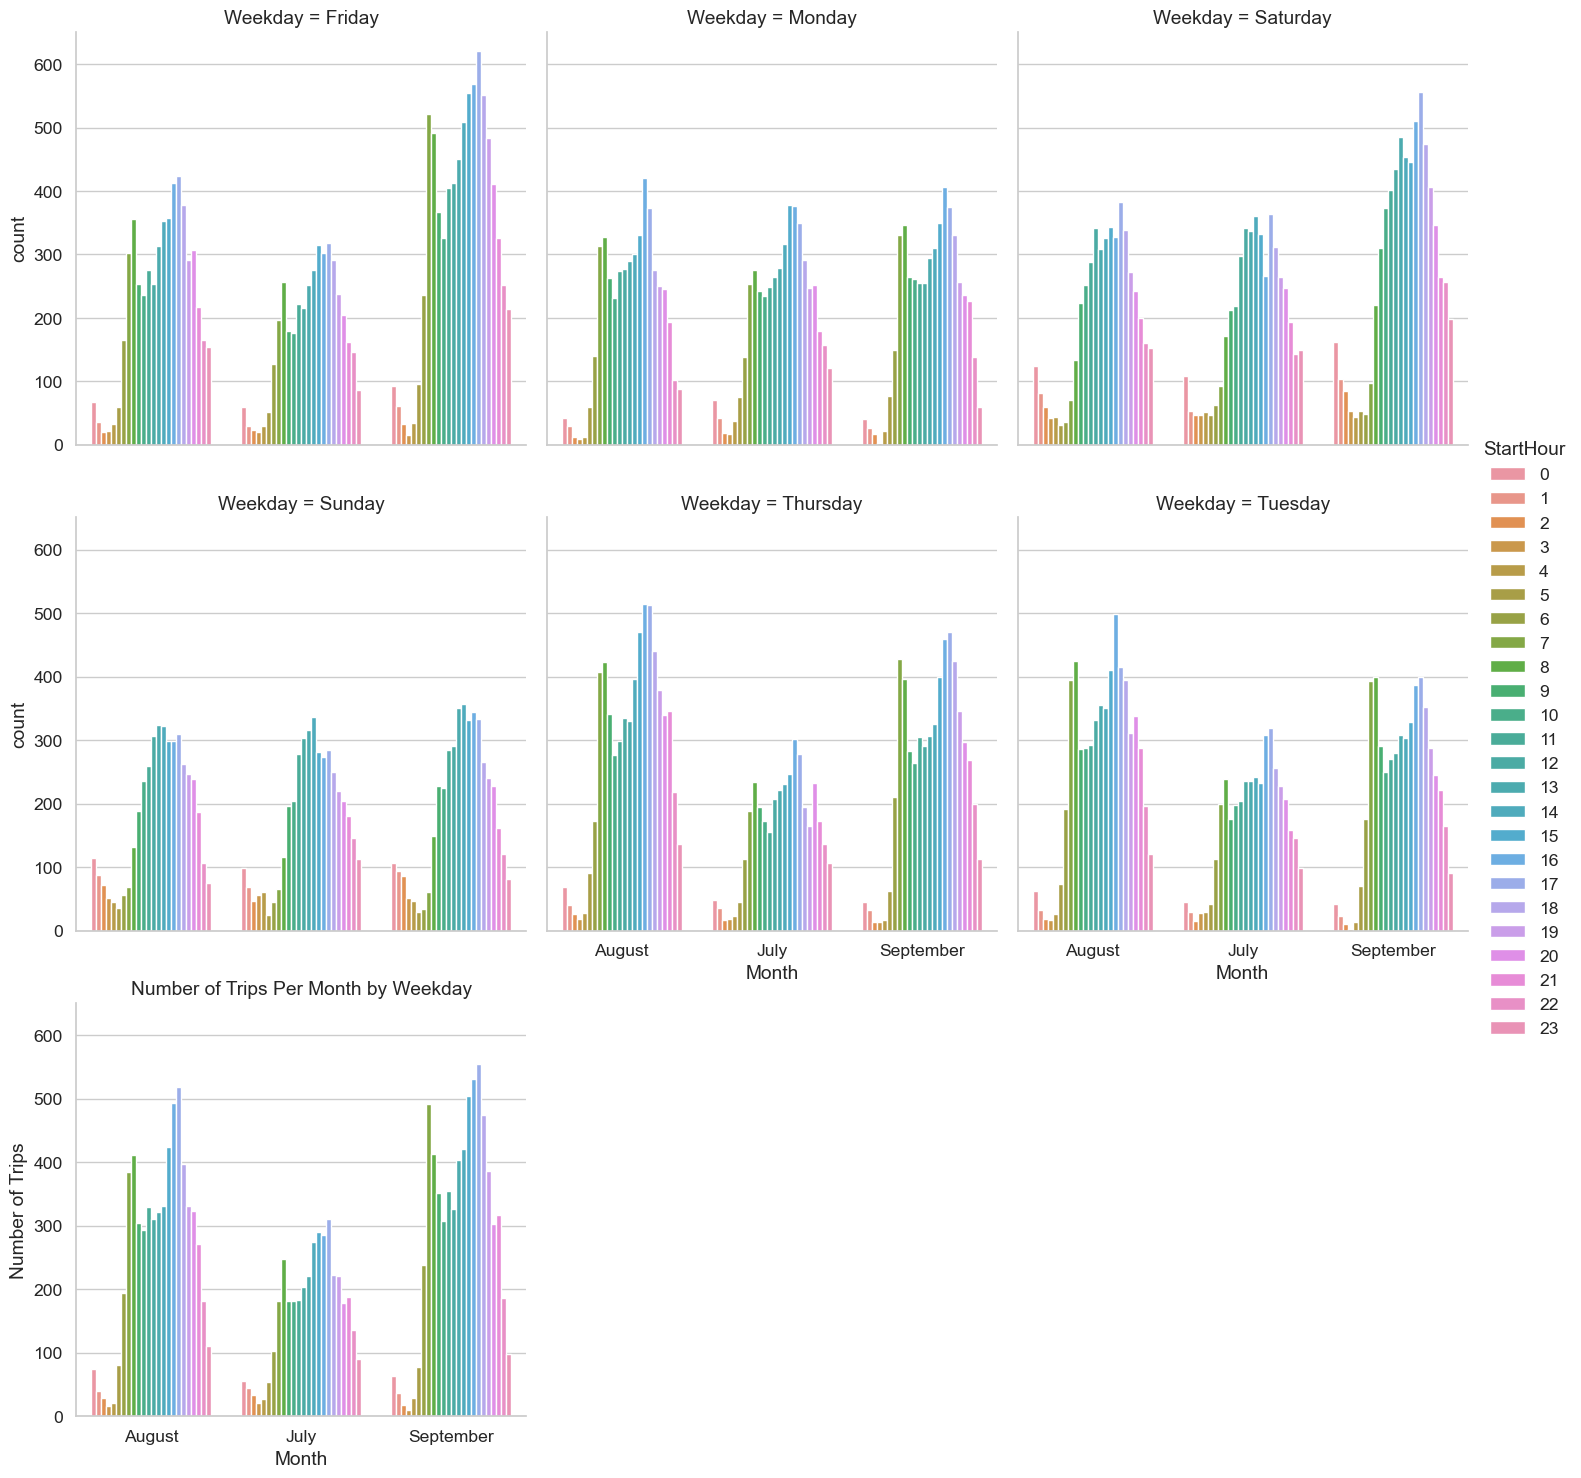

In [22]:
# plot the number of trips per month by weekday 
plt.figure(figsize=(20, 8))

sns.catplot(x='Month', hue='StartHour', data=data,  col = "Weekday", col_wrap=3, kind = 'count')
plt.title('Number of Trips Per Month by Weekday')
plt.xlabel('Month')
plt.ylabel('Number of Trips')

#plt.xticks(rotation=45)
sns.despine()
plt.show()

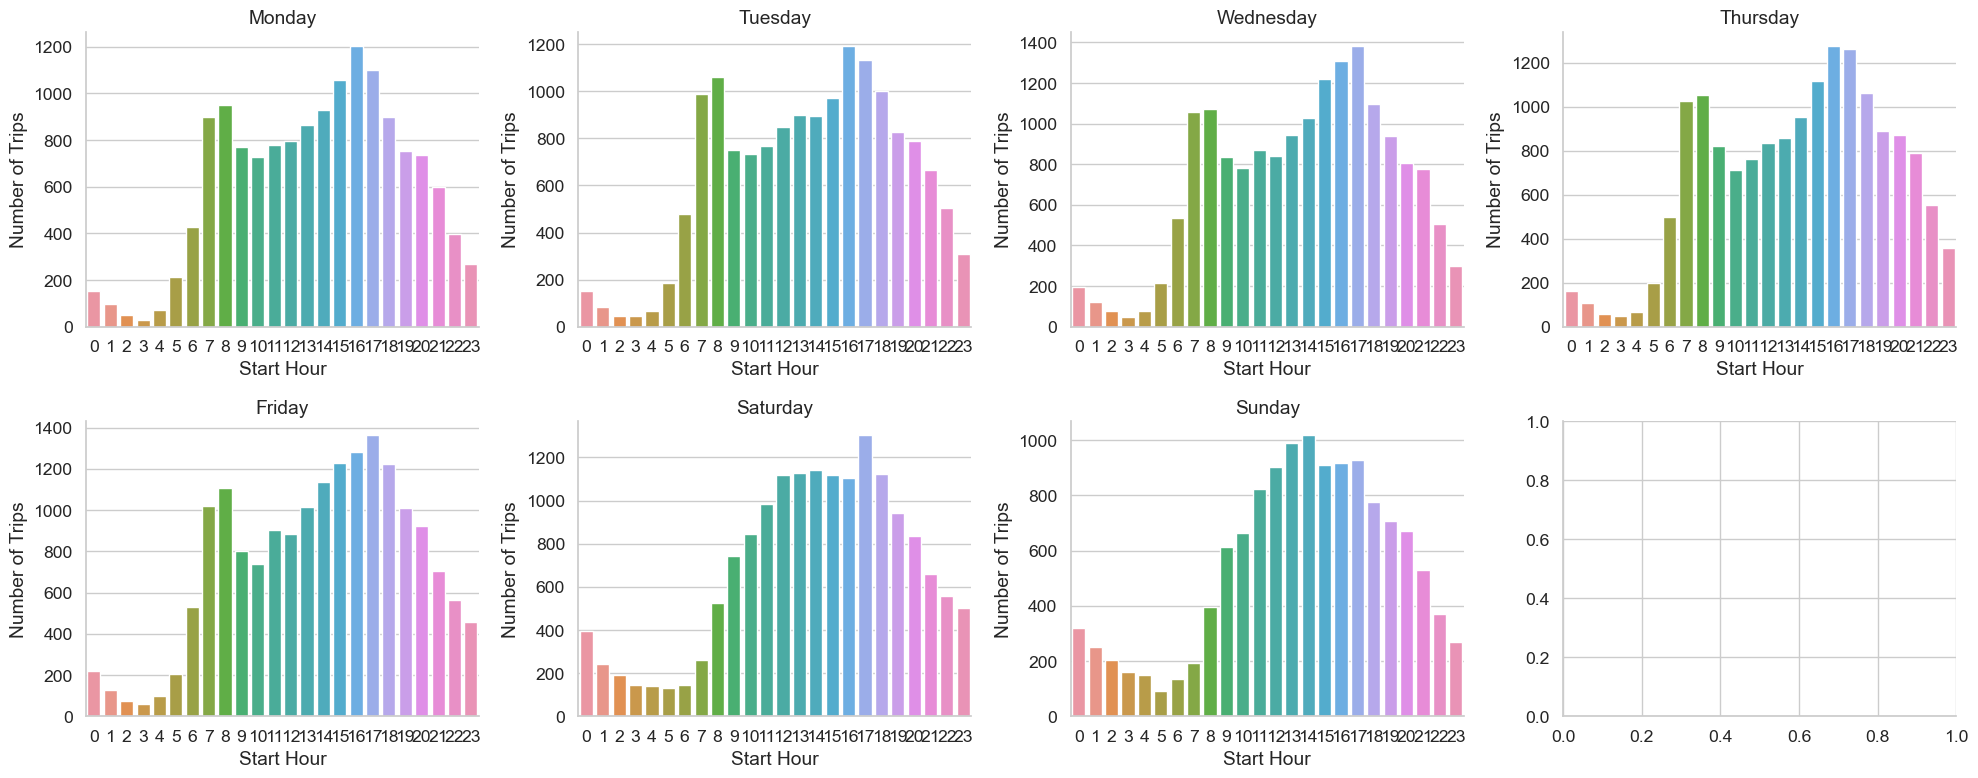

In [23]:
# create a plot of 7 subplots for each weekday by StartHour
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, axs = plt.subplots(2, 4, figsize=(20, 8))
axs = axs.ravel()

for i, day in enumerate(weekdays):
    axs[i].set_title(day)
    sns.countplot(x='StartHour', data=data[data['Weekday'] == day], ax=axs[i])
    axs[i].set_xlabel('Start Hour')
    axs[i].set_ylabel('Number of Trips')

plt.tight_layout()
sns.despine()
plt.show()


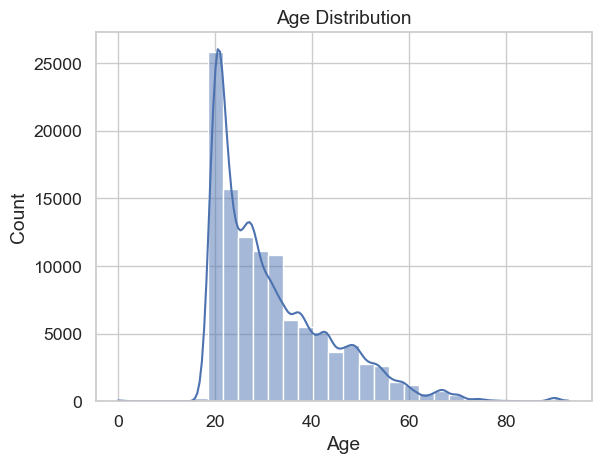

In [24]:
# explore the age distribution using a boxplot

sns.histplot(x='age', data=data, bins=30, kde=True)
plt.title('Age Distribution')   
plt.xlabel('Age')
plt.show()



In [25]:
# remove age < 0 from dataset 
data = data[data['age'] > 0]


In [26]:
# group ages in 4 categories: 0-25, 26-35, 35-50, 51-65, 65+
data['age_group'] = pd.cut(data['age'], bins=[0, 25, 35, 50, 65, 100], labels=['0-25', '26-35', '35-50', '51-65', '65+'])


## Step 11: Advanced Visualizations

Exploring multivariate plots and conducting cluster analysis to identify patterns within variables.

C:\Users\mihai\AppData\Local\Temp\ipykernel_22500\3625191240.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='StartHour', y='CarGenCost', hue='Weekday', data=data, ci=None, palette='viridis')


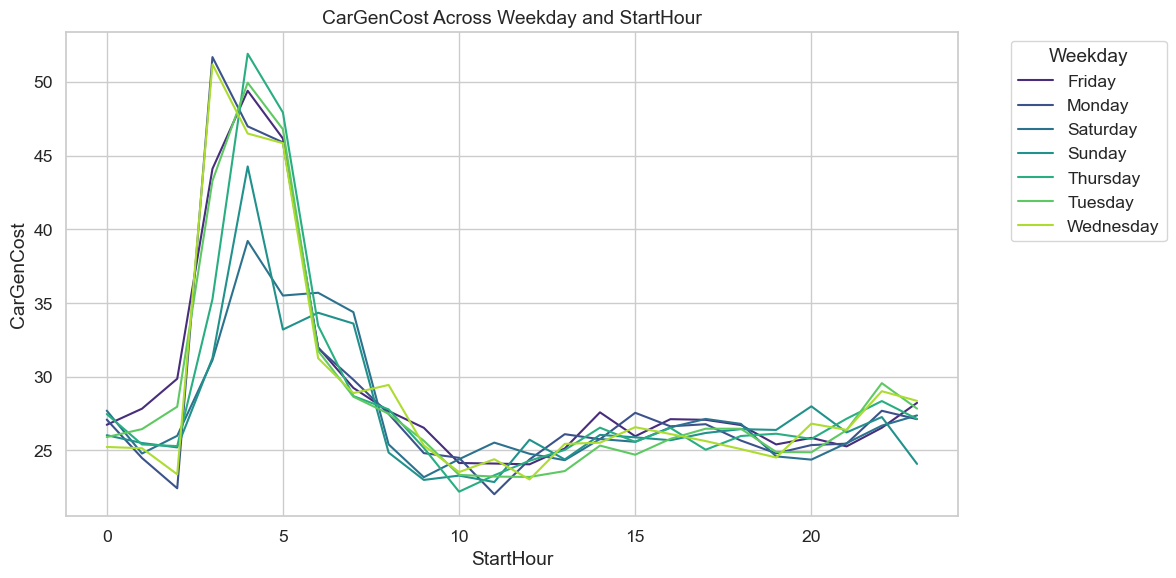

c:\ProgramData\anaconda3\envs\thesis\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


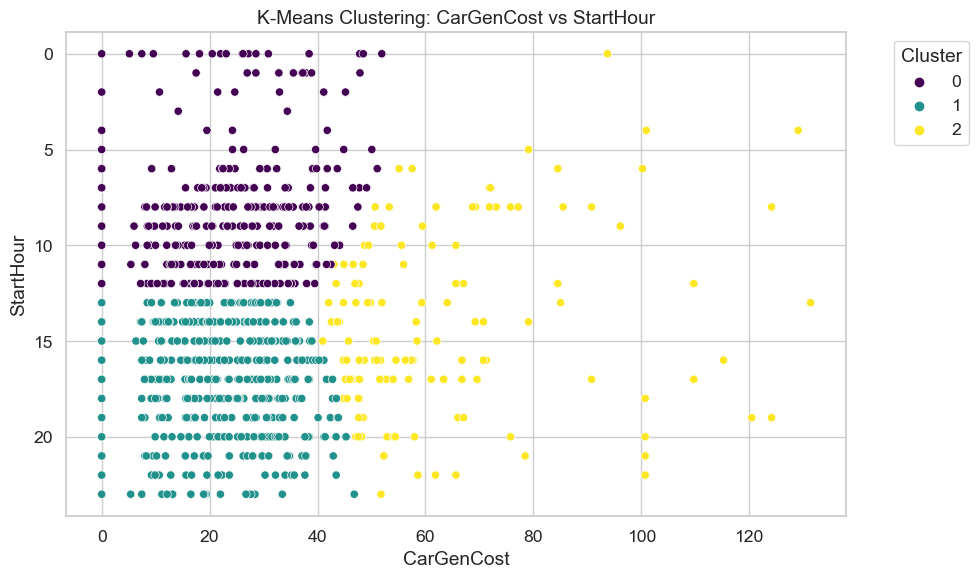

In [27]:

# Advanced Visualizations: Multivariate Plots and Cluster Analysis

# Multivariate Plots: Visualizing 'CarGenCost' across 'Weekday' and 'StartHour'
plt.figure(figsize=(12, 6))
sns.lineplot(x='StartHour', y='CarGenCost', hue='Weekday', data=data, ci=None, palette='viridis')
plt.title('CarGenCost Across Weekday and StartHour')
plt.xlabel('StartHour')
plt.ylabel('CarGenCost')
plt.legend(title='Weekday', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Cluster Analysis: Using K-Means to identify patterns (using 'CarGenCost' and 'StartHour' for simplicity)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting a subset of data for clustering to keep it simple and manageable
cluster_data = data[['CarGenCost', 'StartHour']].dropna().sample(1000, random_state=0)

# Standardizing the data
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(cluster_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CarGenCost', y='StartHour', hue=kmeans.labels_, data=cluster_data, palette='viridis')
plt.title('K-Means Clustering: CarGenCost vs StartHour')
plt.xlabel('CarGenCost')
plt.ylabel('StartHour')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110390 entries, 0 to 164266
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   FromZoneID        110390 non-null  int64         
 1   ToZoneID          110390 non-null  int64         
 2   DriveLength       110390 non-null  float64       
 3   FreeTime          110390 non-null  float64       
 4   CongTime          110390 non-null  float64       
 5   CarGenCost        110390 non-null  float64       
 6   NoOfChange        110390 non-null  float64       
 7   WaitT             110390 non-null  float64       
 8   ZoneWaitT         110390 non-null  float64       
 9   ZoneConT          110390 non-null  float64       
 10  InVehicleT        110390 non-null  float64       
 11  PubDist           110390 non-null  float64       
 12  PubGenCost        110390 non-null  float64       
 13  OBJECTID          110390 non-null  float64       
 14  id       

In [29]:
data.head()

,FromZoneID,ToZoneID,DriveLength,FreeTime,CongTime,CarGenCost,NoOfChange,WaitT,ZoneWaitT,ZoneConT,InVehicleT,PubDist,PubGenCost,OBJECTID,id,tripStart,tripEnd,vehicleId,startPositionLat,startPositionLng,endPositionLat,endPositionLng,age,sex,Month,Weekday,StartHour,ZoneTransition,age_group
0,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,88666.0,2017-07-05 13:11:18,2017-07-05 14:43:05,254.0,55.67551,12.58333,55.67555,12.58313,36.0,M,July,Wednesday,13,102110 to 102110,35-50
1,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,95281.0,2017-07-10 08:43:57,2017-07-10 08:49:17,206.0,55.67511,12.58435,55.67533,12.58326,22.0,M,July,Monday,8,102110 to 102110,0-25
2,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,103791.0,2017-07-16 08:13:52,2017-07-16 08:35:48,30.0,55.67554,12.58329,55.67537,12.58320,21.0,M,July,Sunday,8,102110 to 102110,0-25
3,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,104956.0,2017-07-17 01:17:30,2017-07-17 01:19:22,194.0,55.67540,12.58367,55.67541,12.58369,20.0,F,July,Monday,1,102110 to 102110,0-25
4,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,132487.0,2017-08-05 14:46:51,2017-08-05 14:48:09,203.0,55.67312,12.57928,55.67292,12.57949,27.0,M,August,Saturday,14,102110 to 102110,26-35


In [31]:
# rename columns:startPositionLat,	startPositionLng,	endPositionLat,	endPositionLng, tripStart, tripEnd  to LatitudeStart, LongitudeStart, LatitudeEnd, LongitudeEnd, StartTime, EndTime
data.rename(columns={'startPositionLat': 'LatitudeStart', 'startPositionLng': 'LongitudeStart', 'endPositionLat': 'LatitudeEnd', 'endPositionLng': 'LongitudeEnd', 'tripStart': 'StartTime', 'tripEnd': 'EndTime'}, inplace=True)

In [33]:
data.head()

,FromZoneID,ToZoneID,DriveLength,FreeTime,CongTime,CarGenCost,NoOfChange,WaitT,ZoneWaitT,ZoneConT,InVehicleT,PubDist,PubGenCost,OBJECTID,id,StartTime,EndTime,vehicleId,LatitudeStart,LongitudeStart,LatitudeEnd,LongitudeEnd,age,sex,Month,Weekday,StartHour,ZoneTransition,age_group
0,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,88666.0,2017-07-05 13:11:18,2017-07-05 14:43:05,254.0,55.67551,12.58333,55.67555,12.58313,36.0,M,July,Wednesday,13,102110 to 102110,35-50
1,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,95281.0,2017-07-10 08:43:57,2017-07-10 08:49:17,206.0,55.67511,12.58435,55.67533,12.58326,22.0,M,July,Monday,8,102110 to 102110,0-25
2,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,103791.0,2017-07-16 08:13:52,2017-07-16 08:35:48,30.0,55.67554,12.58329,55.67537,12.58320,21.0,M,July,Sunday,8,102110 to 102110,0-25
3,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,104956.0,2017-07-17 01:17:30,2017-07-17 01:19:22,194.0,55.67540,12.58367,55.67541,12.58369,20.0,F,July,Monday,1,102110 to 102110,0-25
4,102110,102110,1.259823,5.519646,0.0,0.0,0.0,0.0,15.0,3.0,0.779469,0.459823,0.0,-1.0,132487.0,2017-08-05 14:46:51,2017-08-05 14:48:09,203.0,55.67312,12.57928,55.67292,12.57949,27.0,M,August,Saturday,14,102110 to 102110,26-35


<Axes: xlabel='DriveLength', ylabel='Count'>

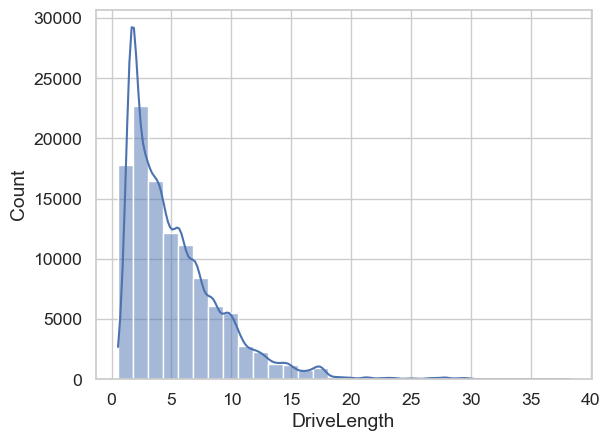

In [34]:
# show distribution of DriveLength
sns.histplot(x='DriveLength', data=data, bins=30, kde=True)

In [36]:
# describe the DriveLength
data.DriveLength.describe()

count    110390.000000
mean          5.272833
std           3.926074
min           0.538451
25%           2.145203
50%           4.197738
75%           7.104349
max          38.197240
Name: DriveLength, dtype: float64

In [37]:
# count the nr of missing values in each column
data.isnull().sum()

FromZoneID           0
ToZoneID             0
DriveLength          0
FreeTime             0
CongTime             0
CarGenCost           0
NoOfChange           0
WaitT                0
ZoneWaitT            0
ZoneConT             0
InVehicleT           0
PubDist              0
PubGenCost           0
OBJECTID             0
id                   0
StartTime            0
EndTime              0
vehicleId            0
LatitudeStart        0
LongitudeStart       0
LatitudeEnd          0
LongitudeEnd         0
age                  0
sex               2247
Month                0
Weekday              0
StartHour            0
ZoneTransition       0
age_group            0
dtype: int64

In [38]:
# save the data to a new csv file
data.to_csv('../data/processed/gm_cleaned.csv', index=False)
